This classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
df=pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
x=df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
x[0:7]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607000000000001],
       [49, 'F', 'NORMAL', 'HIGH', 16.275]], dtype=object)

In [10]:
y=df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

As you may figure out, some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. pandas.get_dummies() Convert categorical variable into dummy/indicator variables.

In [12]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1] = le_sex.transform(x[:,1]) 


le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])


le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3]) 

x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape
y_train.shape
x_test.shape
y_test.shape

(40,)

Modeling
We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [17]:
drugtree=DecisionTreeClassifier(criterion="entropy",max_depth=4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [18]:
drugtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
predtree=drugtree.predict(x_test)

In [22]:
print(predtree[0:7])
print(y_test[0:7])

['drugC' 'drugX' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX']
18     drugC
170    drugX
107    drugY
98     drugY
177    drugY
182    drugX
5      drugX
Name: Drug, dtype: object


Evaluation
Next, let's import metrics from sklearn and check the accuracy of our model.


In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predtree))

DecisionTrees's Accuracy:  1.0


[Text(209.25, 195.696, 'X[4] <= 14.829\nentropy = 2.008\nsamples = 160\nvalue = [20, 15, 13, 40, 72]'),
 Text(167.4, 152.208, 'X[2] <= 0.5\nentropy = 1.846\nsamples = 88\nvalue = [20, 15, 13, 40, 0]'),
 Text(83.7, 108.72, 'X[0] <= 50.5\nentropy = 0.985\nsamples = 35\nvalue = [20, 15, 0, 0, 0]'),
 Text(41.85, 65.232, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0, 0]'),
 Text(125.55000000000001, 65.232, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15, 0, 0, 0]'),
 Text(251.10000000000002, 108.72, 'X[2] <= 1.5\nentropy = 0.804\nsamples = 53\nvalue = [0, 0, 13, 40, 0]'),
 Text(209.25, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 26\nvalue = [0, 0, 13, 13, 0]'),
 Text(167.4, 21.744, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 13, 0, 0]'),
 Text(251.10000000000002, 21.744, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 0, 13, 0]'),
 Text(292.95, 65.232, 'entropy = 0.0\nsamples = 27\nvalue = [0, 0, 0, 27, 0]'),
 Text(251.10000000000002, 152.208, 'entropy = 0.0\nsamples = 72\nvalue = [0, 0,

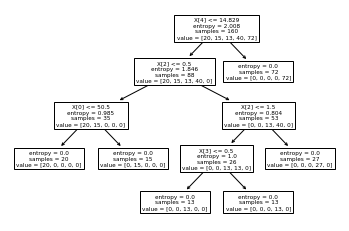

In [27]:
from sklearn import tree
tree.plot_tree(drugtree)